# Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [1]:
!pip install yfinance

In [3]:
import yfinance as yf
tesla_stock = yf.Ticker("TSLA")
tesla_data = tesla_stock.history(period="max")
print(tesla_data.head(5))

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


# Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [17]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data  = requests.get(url).text

In [18]:
soup = BeautifulSoup(html_data, 'html.parser')

In [20]:
tesla_revenue=pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Revenue = col[1].text

    tesla_revenue = pd.concat([tesla_revenue,pd.DataFrame({"Date":[date], "Revenue":[Revenue]})], ignore_index=True)   

In [21]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "")

In [24]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla_revenue.head()

,Date,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


# Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [25]:
gamestop_stock = yf.Ticker("GME")
gamestop_data = gamestop_stock.history(period="max")
print(gamestop_data.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


# Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [28]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2  = requests.get(url).text
soup = BeautifulSoup(html_data_2, 'html.parser')
gme_revenue=pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Revenue = col[1].text

    gme_revenue = pd.concat([gme_revenue,pd.DataFrame({"Date":[date], "Revenue":[Revenue]})], ignore_index=True) 
gme_revenue.head()

,Date,Revenue
0,2020,"$6,466"
1,2019,"$8,285"
2,2018,"$8,547"
3,2017,"$7,965"
4,2016,"$9,364"


# Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

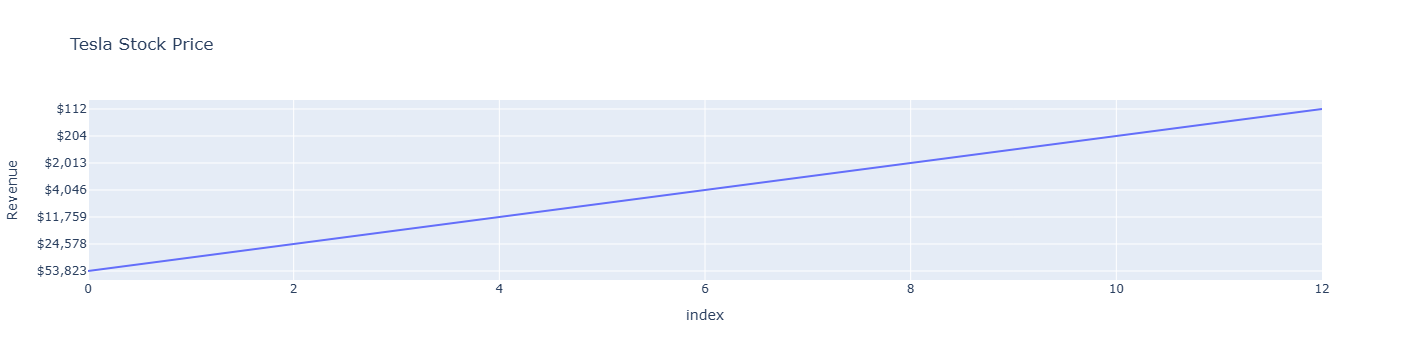

In [32]:
import plotly.express as px

fig = px.line(tesla_revenue, x=tesla_revenue.index, y="Revenue", title="Tesla Stock Price")
fig.show()

# Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

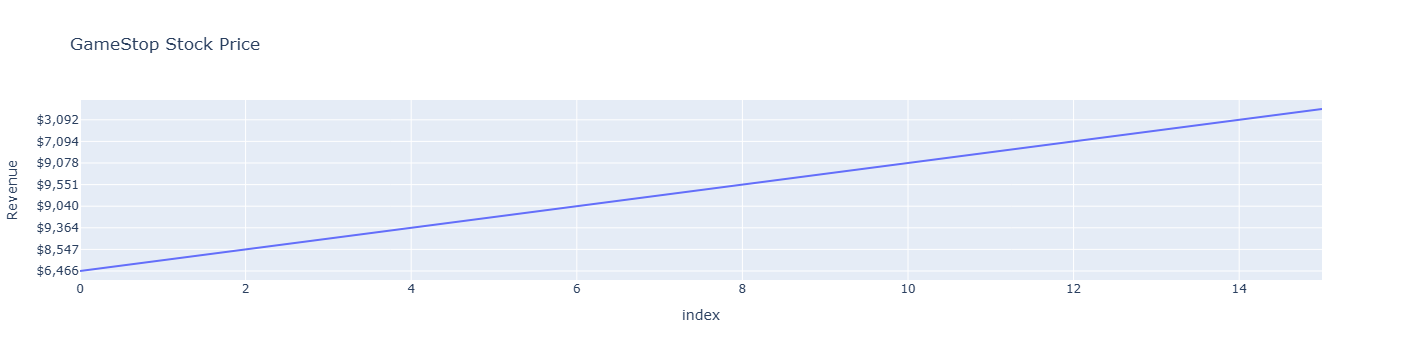

In [33]:
fig = px.line(gme_revenue, x=gme_revenue.index, y="Revenue", title="GameStop Stock Price")
fig.show()